## on this notebook , we will try to visualize data in different situations

In [13]:
# Importing the necessary packages
from sklearn import preprocessing
import numpy as np
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline

##### import data 

In [14]:
df = pd.read_csv('Advertising.csv')

In [15]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


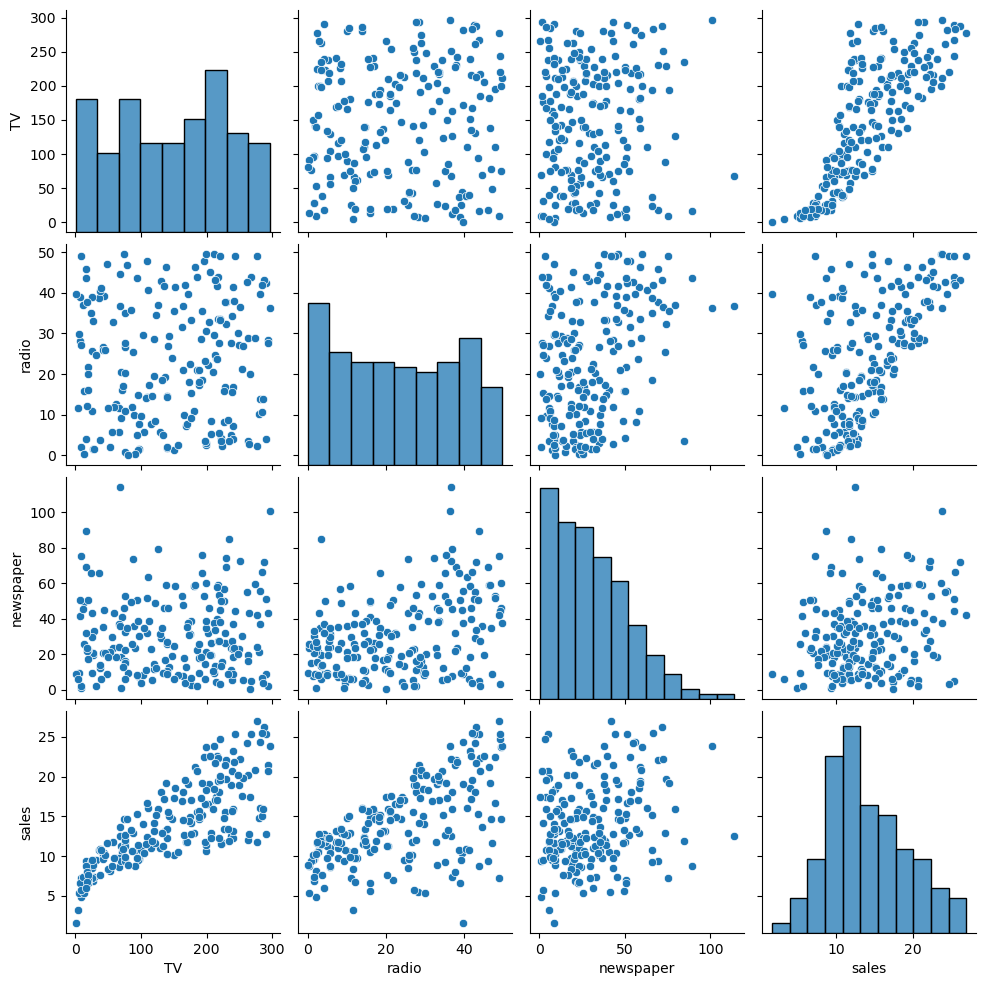

In [16]:
# Relationships between features
sns.pairplot(df)

<AxesSubplot:>

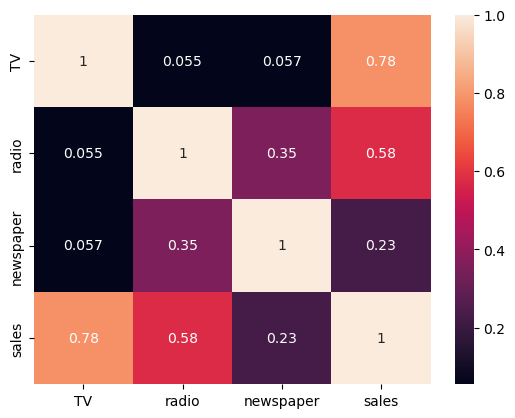

In [17]:
# Another good thing to do is to plot a heatmap of correlation between each column.
sns.heatmap(df.corr(), annot=True)

**Visualize histogram of Sales**

<AxesSubplot:xlabel='sales', ylabel='Count'>

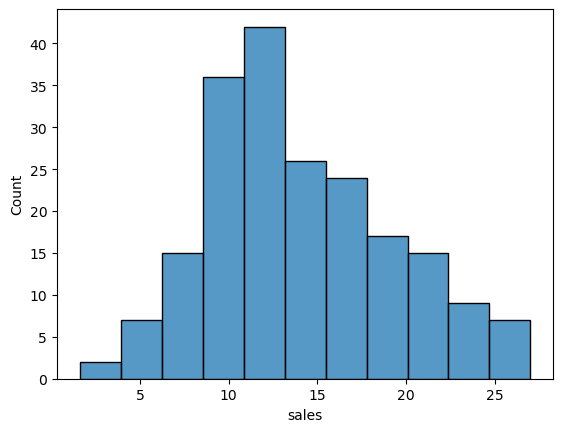

In [21]:
sns.histplot(data=df["sales"])

### Train and test 

In [24]:
from sklearn.model_selection import train_test_split
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [26]:
X=df[["TV","radio","newspaper"]]
Y=df['sales']

In [27]:
x_train , x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=101)

In [28]:
print(len(x_train))
print(len(x_test))

140
60


In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
reg_model=LinearRegression()

In [31]:
reg_model.fit(x_train,y_train)

LinearRegression()

In [32]:
y_predict =reg_model.predict(x_test)

**Create a scatterplot of the real test values versus the predicted values.**

<AxesSubplot:xlabel='sales'>

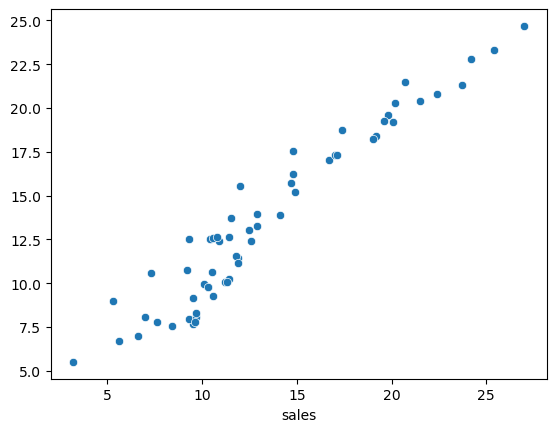

In [33]:
sns.scatterplot(x=y_test,y=y_predict)

### Evaluating the Model


The three most common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [35]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [36]:
MAE = mean_absolute_error(y_test,y_predict)
MSE = mean_squared_error(y_test,y_predict)
RMSE = np.sqrt(MSE)

In [37]:
print(MAE)
print(MSE)
print(RMSE)

1.2137457736144805
2.298716697886378
1.5161519375993877


**Plot a histogram of the residuals (difference between real labels and predicted labels) and make sure it looks normally distributed.** This helps us understand if Linear Regression was a valid model choice.

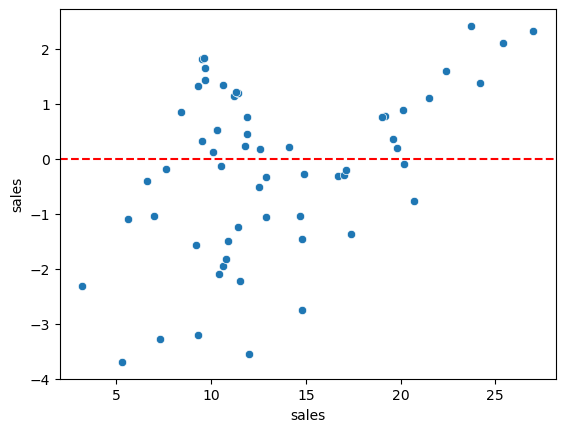

In [40]:
test_res = y_test - y_predict
sns.scatterplot(x=y_test,y=test_res)
plt.axhline(y=0, color='r', linestyle='--')

C:\Users\moham.DESKTOP-3UOA6L4\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


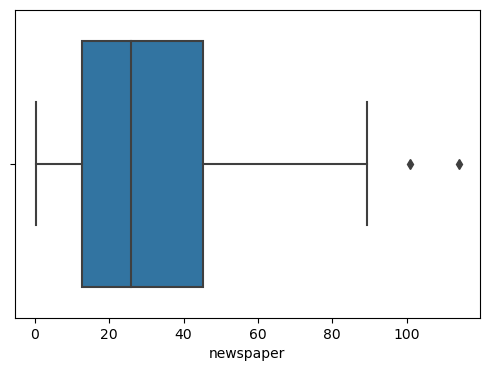

In [42]:
plt.figure(figsize=(6,4))
sns.boxplot(df['newspaper'])
plt.show()

C:\Users\moham.DESKTOP-3UOA6L4\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sales', ylabel='Density'>

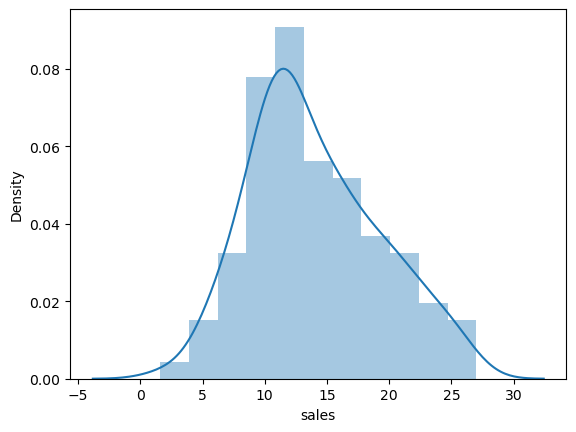

In [44]:
# Explore the distribution plot of the label.
sns.distplot(df["sales"])
# Follows a normal distribution.